In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('./src')

from plot import *
from matrix import *
from ordinate import *
import pickle
from transform import *
import matplotlib.pyplot as plt
import rdata

In [2]:
DATA_DIR = '/home/prichter/Documents/trophy/data'

The vegan package in R comes with an [example dataset called dune](https://www.rdocumentation.org/packages/vegan/versions/2.6-4/topics/dune), which contains a bunch of data for different plant species. These data are stored in the vegan GitHub repository as rda files, which can be read in a Python environment using the `rdata` Python package. This data has already been scaled and transformed, so requires minimal preprocessing.

The `rdata.read_rda` function call below reads in the dataset as a pandas `DataFrame` with taxonomy groups as columns and samples as row indices. 

In [3]:
dune_df = rdata.read_rda(f'{DATA_DIR}/dune.rda')['dune']
dune_metadata_df = rdata.read_rda(f'{DATA_DIR}/dune.env.rda')['dune.env'].rename(columns={c:c.lower() for c in ['A1', 'Moisture', 'Management', 'Use', 'Manure']})

In [4]:
dune_metadata_df.head()

,a1,moisture,management,use,manure
1,2.8,1,SF,Haypastu,4
2,3.5,1,BF,Haypastu,2
3,4.3,2,SF,Haypastu,4
4,4.2,2,SF,Haypastu,4
5,6.3,1,HF,Hayfield,2


In [5]:
dune_metadata_df.moisture.values

['1', '1', '2', '2', '1', ..., '5', '2', '1', '5', '5']
Length: 20
Categories (4, object): ['1' < '2' < '4' < '5']

In [6]:
# Load the dune data into an CountMatrix object. 
dune_M = CountMatrix().from_pandas(dune_df)

# Make sure there is a serial_code field in the metadata. 
dune_metadata_df['serial_code'] = dune_metadata_df.index
dune_M.metadata = dune_metadata_df

In [7]:
# # Slightly concerned by this, as I don't think there should be any empty columns.
# # Possibly because two samples are dropped in the setup.ipynb notebook: Dropping 192136 rows in the counts data which do not have associated metadata.
# ! python ./scripts/create.py '{DATA_DIR}/data.csv' 'asv_matrix.mtx' -l 'asv' -m '{DATA_DIR}/metadata.csv'

In [44]:
# Load the ASV matrix from the pickle file. Should already have the metadata stored. 
with open('asv_matrix.mtx', 'rb') as f:
    M = pickle.load(f)

# data = pd.read_csv(f'{DATA_DIR}/ASVs_counts_Mar2023.tsv', delimiter='\t', index_col=0)
# data = data.drop(columns=['HDK-DNAexNegLot169030916-30cyc', 'HDK22-KML-sand-dry','HDK22-KML-sand-wet', 'HDK-MAR-PCR-BLANK'])
# data = data.transpose()
# M = CountMatrix(level='asv').from_pandas(data)

# n_components = 2 
# model_bray_curtis = NonmetricMultidimensionalScaling(n_components=n_components, metric='bray-curtis', max_tries=200)
# model_bray_curtis.fit(M)

model = CanonicalCorrespondenceAnalysis(fields=['moisture'])
model.fit(dune_M)


<Axes: xlabel='CCA_1', ylabel='CCA_2'>

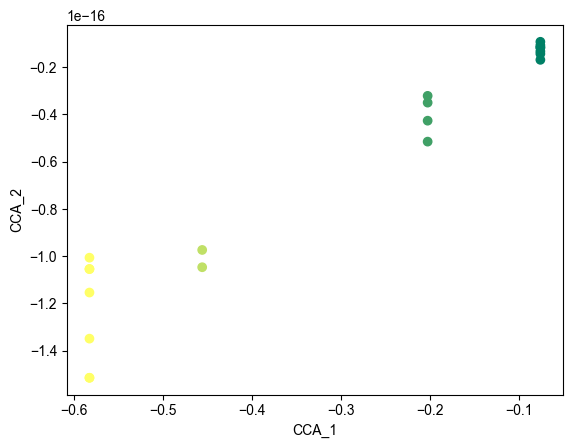

In [45]:
model.plot(colors=dune_M.get_metadata(fields='moisture'))

In [9]:
model_bray_curtis.stress
model_bray_curtis.fit_vector(M.metadata.get('flux_ch4'))
model_bray_curtis.fit_surface(M.metadata.get('flux_ch4'))

NameError: name 'model_bray_curtis' is not defined

In [ ]:
model_bray_curtis.vector_fits['flux_ch4'].p

0.04104104104104104

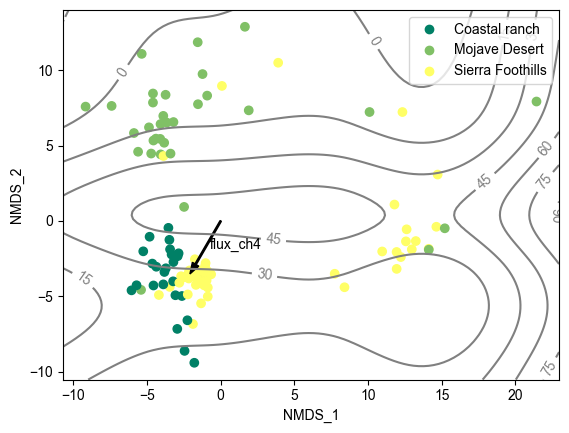

In [ ]:
# model_bray_curtis.plot(colors=dune_M.get_metadata('management'))
model_bray_curtis.plot(colors=M.get_metadata('site'), show_surface_fit='flux_ch4', show_vector_fit=['flux_ch4'])
plt.show()


In [ ]:
model_bray_curtis.model.n_iter_

5